# 第11章 相対的剥奪のモデル(3)：シミュレーション

第9章・第10章で学んだ相対的剥奪モデルをRで可視化・シミュレーションします。

**この章の目標**:
- Boudon-Kosakaモデルの解析解 $S^*(\gamma)$ をグラフで確認する
- Yitzhakiモデル $D(t) = \mu(t)\,G(t)$ の「経済発展と相対的剥奪」の軌跡をシミュレーションする
- 成長率やジニ係数の変化幅を自分で変えて、パラドックスが生じる条件を探る

*このノートブックは Claude Sonnet 4.6 を利用して作成しました。*

---

## 11.1 Boudon-Kosakaモデルの軌跡

第9章で導いたナッシュ均衡時の**剥奪割合**の公式を再確認します。

$$
S^*(\gamma) = \begin{cases}
\left(\dfrac{B}{C} - 1\right)\gamma & (0 \leq \gamma \leq C/B) \\[6pt]
1 - \gamma & (C/B < \gamma \leq 1)
\end{cases}
$$

- $\gamma$：集団の成功割合（大きいほど「恵まれた集団」）
- **逆説**：$\gamma < C/B$ の範囲では、$\gamma$ が増えると $S^*$ も増える

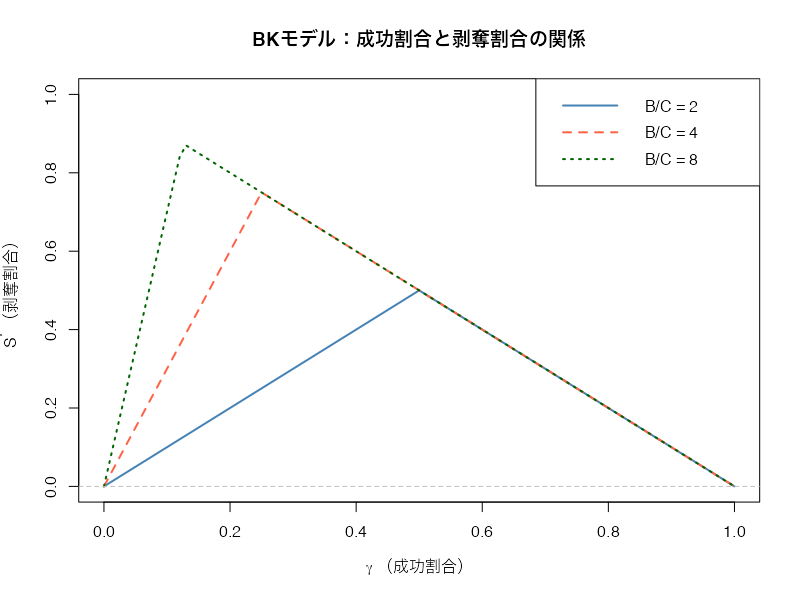

In [17]:
# 剥奪割合 S* の関数
S_star <- function(gamma, B, C) {
  ifelse(gamma <= C / B,
         (B / C - 1) * gamma,
         1 - gamma)
}

gamma_seq <- seq(0, 1, by = 0.01)
BC_ratios <- c(2, 4, 8)

S_mat <- sapply(BC_ratios, function(bc) S_star(gamma_seq, B = bc, C = 1))

matplot(gamma_seq, S_mat,
        type = "l", lty = 1:3, lwd = 2,
        col  = c("steelblue", "tomato", "darkgreen"),
        xlab = expression(gamma ~ "（成功割合）"),
        ylab = expression(S^"*" ~ "（剥奪割合）"),
        main = "BKモデル：成功割合と剥奪割合の関係",
        ylim = c(0, 1))
legend("topright",
       legend = paste0("B/C = ", BC_ratios),
       col    = c("steelblue", "tomato", "darkgreen"),
       lty = 1:3, lwd = 2)
abline(h = 0, col = "gray", lty = 2)

> - 折れ点（$\gamma = C/B$）まで：$\gamma$ が増えると剥奪も増える（逆説ゾーン）
> - 折れ点以降：全員が投資するため、成功者が増えると剥奪は減る
> - B/C 比が大きいほど最大剥奪が高く、逆説ゾーンが狭い

---

## 11.2 Yitzhakiモデル：$D(t) = \mu(t)\,G(t)$

第10章で学んだ社会的相対的剥奪指数の基本式：

$$D = \mu \cdot G$$

- $\mu$：平均所得（経済水準）
- $G$：ジニ係数（不平等度）
- $D$：社会的相対的剥奪指数

これを時間 $t$ の関数として、**パラメータを変えながら** $\mu$・$G$・$D$ の軌跡を見ます。

**注目する理論的条件**（第10章）：
$$D'(t) > 0 \iff \frac{\mu'}{\mu} > -\frac{G'}{G}$$
つまり平均所得の成長率がジニ係数の（負の）変化率を上回るとき、$D$ は増加する。

In [18]:
# ---- ここを変えてみよう ----
r_mu  <- 0.04   # 平均所得の年成長率（例：0.04 = 4%）
G_end <- 0.50   # 30年後のジニ係数（初期値 G0 = 0.30）
# ----------------------------

t   <- 0:30
mu0 <- 200
G0  <- 0.30

mu_sim <- mu0 * (1 + r_mu)^t
G_sim  <- G0 + (G_end - G0) * t / 30
D_sim  <- mu_sim * G_sim

# 理論条件の確認（線形近似）
r_G <- (G_end - G0) / (G0 * 30)
cat("平均所得の成長率 μ'/μ ≒", r_mu, "\n")
cat("ジニ係数の変化率 G'/G ≒",  round(r_G, 4), "\n")
cat("→ 理論予測：D は",
    ifelse(r_mu > -r_G, "増加（剥奪が悪化）", "減少（剥奪が改善）"), "\n")

平均所得の成長率 μ'/μ ≒ 0.04 
ジニ係数の変化率 G'/G ≒ 0.0222 
→ 理論予測：D は 増加（剥奪が悪化） 


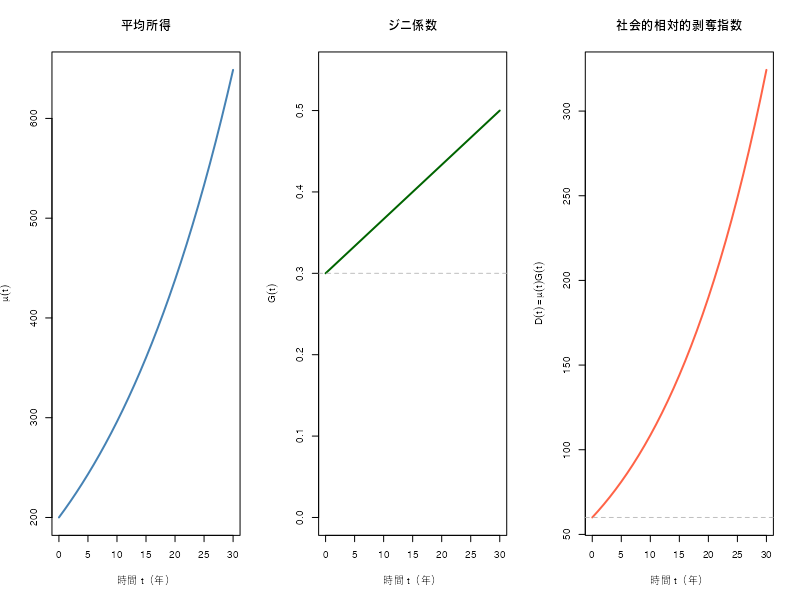

In [19]:
# μ・G・D の軌跡を3パネルで確認
par(mfrow = c(1, 3))

plot(t, mu_sim, type = "l", lwd = 2, col = "steelblue",
     xlab = "時間 t（年）", ylab = expression(mu(t)),
     main = "平均所得")

plot(t, G_sim, type = "l", lwd = 2, col = "darkgreen",
     xlab = "時間 t（年）", ylab = expression(G(t)),
     main = "ジニ係数",
     ylim = c(0, max(G_sim) * 1.1))
abline(h = G0, col = "gray", lty = 2)

plot(t, D_sim, type = "l", lwd = 2, col = "tomato",
     xlab = "時間 t（年）", ylab = expression(D(t) == mu(t) * G(t)),
     main = "社会的相対的剥奪指数")
abline(h = D_sim[1], col = "gray", lty = 2)

par(mfrow = c(1, 1))

> $\mu$（青）・$G$（緑）・$D$（赤）それぞれの動きを確認したら、
> 上のセルに戻って `r_mu` や `G_end` を変えて再実行してみよう。
> $D$ が増加から減少に切り替わる境界（$\mu'/\mu = -G'/G$）を探してみてください。

---

## 11.3 シナリオ比較

第10章の表で整理した経済発展パターンのうち、「経済が成長する」シナリオを重ねてみます。

| シナリオ | $\mu'$ | $G'$ | モデル的対応 |
|---|---|---|---|
| 1：成長＋不平等化 | $> 0$ | $> 0$ | 中国型（チャイナ・パラドックス） |
| 2：成長＋不平等度一定 | $> 0$ | $= 0$ | 標準的成長 |
| 3：成長＋緩やかな平等化 | $> 0$ | $< 0$（小） | 強パラドックスの可能性あり |
| 4：低成長＋急速な平等化 | $> 0$（小） | $< 0$（大） | $D$ が減少するケース |

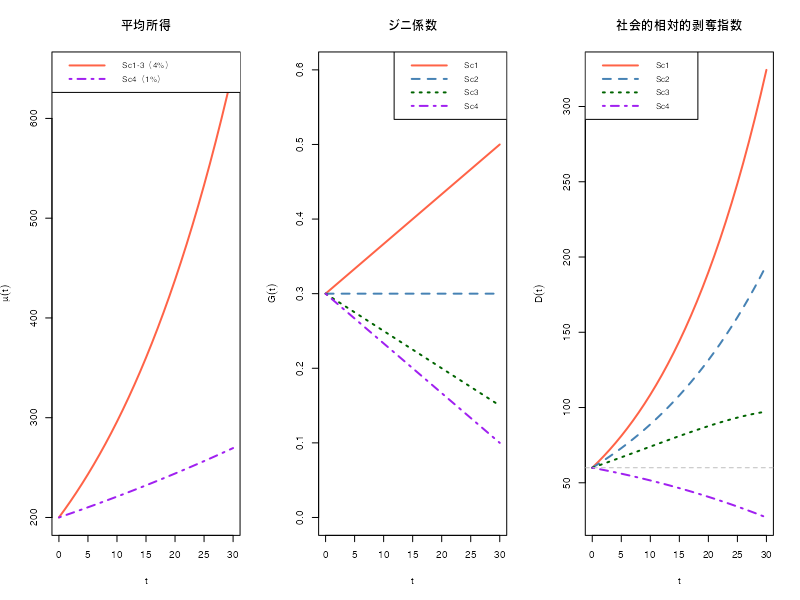

In [20]:
# 4シナリオの設定
mu1 <- mu0 * 1.04^t;  G1 <- G0 + (0.50 - G0) * t / 30  # 成長＋不平等化
mu2 <- mu0 * 1.04^t;  G2 <- rep(G0, length(t))           # 成長＋不平等度一定
mu3 <- mu0 * 1.04^t;  G3 <- G0 - (G0 - 0.15) * t / 30   # 成長＋緩やかな平等化
mu4 <- mu0 * 1.01^t;  G4 <- G0 - (G0 - 0.10) * t / 30   # 低成長＋急速な平等化

D1 <- mu1 * G1;  D2 <- mu2 * G2
D3 <- mu3 * G3;  D4 <- mu4 * G4

cols <- c("tomato", "steelblue", "darkgreen", "purple")

par(mfrow = c(1, 3))

# μ(t)
plot(t, mu1, type = "l", lwd = 2, col = cols[1],
     ylim = range(c(mu1, mu4)),
     xlab = "t", ylab = expression(mu(t)), main = "平均所得")
lines(t, mu4, lwd = 2, col = cols[4], lty = 4)
legend("topleft", legend = c("Sc1-3（4%）", "Sc4（1%）"),
       col = cols[c(1,4)], lty = c(1,4), lwd = 2, cex = 0.8)

# G(t)
plot(t, G1, type = "l", lwd = 2, col = cols[1],
     ylim = c(0, 0.6),
     xlab = "t", ylab = expression(G(t)), main = "ジニ係数")
lines(t, G2, lwd = 2, col = cols[2], lty = 2)
lines(t, G3, lwd = 2, col = cols[3], lty = 3)
lines(t, G4, lwd = 2, col = cols[4], lty = 4)
legend("topright", legend = paste0("Sc", 1:4),
       col = cols, lty = 1:4, lwd = 2, cex = 0.8)

# D(t)
plot(t, D1, type = "l", lwd = 2, col = cols[1],
     ylim = range(c(D1, D2, D3, D4)),
     xlab = "t", ylab = expression(D(t)), main = "社会的相対的剥奪指数")
lines(t, D2, lwd = 2, col = cols[2], lty = 2)
lines(t, D3, lwd = 2, col = cols[3], lty = 3)
lines(t, D4, lwd = 2, col = cols[4], lty = 4)
abline(h = D1[1], col = "gray", lty = 2)
legend("topleft", legend = paste0("Sc", 1:4),
       col = cols, lty = 1:4, lwd = 2, cex = 0.8)

par(mfrow = c(1, 1))

> - **シナリオ1〜3**はいずれも経済成長しているが、$D$ は増加し続ける（不幸な発展パラドックス）
> - **シナリオ3**（緑）は $G$ が下がっているにもかかわらず $D$ が増加する——これが**強パラドックス**
> - **シナリオ4**のみ $D$ が減少する：低成長でも急速な平等化が上回れば剥奪は改善する